<div style="text-align: center"> <h1>Project Report</h1></div>

***

<div style="text-align: center"> <h2>Predicting Occupation Using Knn-Classifciation</h2></div>

<h4> Introduction </h4>

A person's occupation has a significant impact on their lifestyle and health. Overall well-being can be influenced by a number of work-related factors, including physical demands, irregular hours, sedentary positions, and stress related to one's job. Maintaining a healthy balance between work obligations and personal well-being is essential for a long-lasting and satisfying career. The following suggestion is based on this awareness:

Our work is founded on the concept that different occupational categories may show certain patterns in health and wellness parameters, allowing one to infer a person's career from variables like stress and sleep habits.

Our research aims to determine whether it is possible to predict an individual's occupation using predictor variables from the dataset of interest. 

The Sleep Health and Lifestyle Dataset includes data on gender, age, occupation, sleep metrics, physical activity, stress levels, BMI, cardiovascular health, and sleep disorders. The dataset's columns consist of Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder Status (None, Insomnia, Sleep Apnea). This dataset facilitates in-depth analysis of sleep patterns, lifestyle factors, cardiovascular health, and sleep disorders for a diverse population.
The Hypothesis underlying our study is that distinct occupational categories may exhibit specific patterns in health and wellness factors, making it possible to infer a person's profession based on factors such as sleep and stress levels. 


In [10]:
library(repr)
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(ggplot2)
library(kknn)
library(tidymodels)


url  <- "https://raw.githubusercontent.com/hmza-exe/DSCI-100-GroupProject_003-12/main/Sleep_health_and_lifestyle_dataset.csv"
occupation_names <- c("Doctor","Teacher" ,"Nurse" ,"Engineer" ,"Accountant", "Lawyer" , "Salesperson")
sleep_health_data <- read_csv(url) |> 
                        rename("person_id" = "Person ID",
                               "gender" = "Gender",
                               "age" = "Age", "occupation" = "Occupation",
                               "sleep_duration" = "Sleep Duration",
                               "quality_of_sleep" = "Quality of Sleep",
                               "physical_activity_level" = "Physical Activity Level",
                               "stress_level" = "Stress Level",
                               "bmi_category" = "BMI Category",
                               "blood_pressure" = "Blood Pressure",
                               "heart_rate" = "Heart Rate",
                               "daily_steps" = "Daily Steps",
                               "sleep_disorder" = "Sleep Disorder")|>
                        select(occupation, daily_steps, physical_activity_level, stress_level, quality_of_sleep, sleep_duration) |>
filter(occupation %in% occupation_names) |>
                        mutate(occupation = as_factor(occupation))
head(sleep_health_data)
tail(sleep_health_data)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Teacher,3500,40,7,6,6.3
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.0
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1


In [11]:
sleep_health_data_scaled <- sleep_health_data |>
                        mutate(scaled_daily_steps = scale(daily_steps, center = TRUE),
                               scaled_physical_activity = scale(physical_activity_level, center = TRUE),
                                scaled_stress_level = scale(stress_level, center = TRUE),
                              scaled_quality_of_sleep = scale(quality_of_sleep, center = TRUE),
                              scaled_sleep_duration = scale(sleep_duration, center = TRUE)) 
head(sleep_health_data_scaled)
tail(sleep_health_data_scaled)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Doctor,10000,60,8,6,6.2,1.9730987,0.01599315,1.4960715,-1.1962837,-1.2136877
Doctor,10000,60,8,6,6.2,1.9730987,0.01599315,1.4960715,-1.1962837,-1.2136877
Teacher,3500,40,7,6,6.3,-2.1229125,-0.94359587,0.9321318,-1.1962837,-1.0867593
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.0,0.08263197,0.7356849,-1.323627,1.430234,1.071024
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953


In [12]:
sleep_health_data_split <- initial_split(sleep_health_data, prop = 0.75, strata = occupation)


sleep_train <- training(sleep_health_data_split)   
sleep_test <- testing(sleep_health_data_split)

head(sleep_train)
head(sleep_test)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accountant,7000,50,6,8,7.2
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.1
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.1


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,30,8,6,6.1
Doctor,8000,75,6,7,7.6
Doctor,8000,75,6,7,7.7


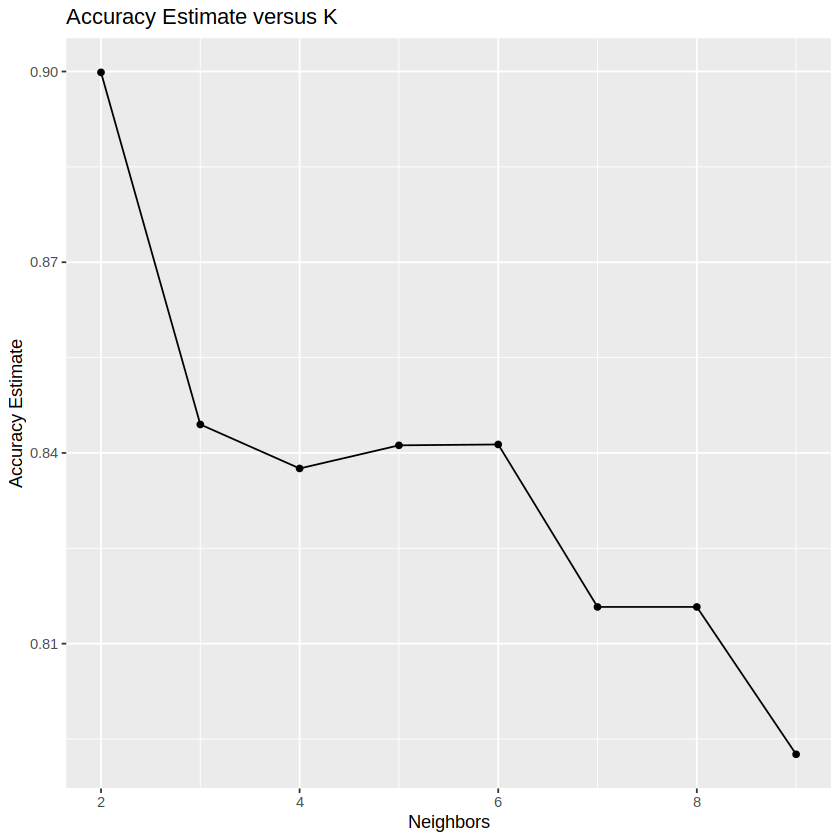

In [18]:
sleep_recipe <- recipe(occupation ~ ., data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

sleep_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = occupation)
k_vals <- tibble(neighbors = seq(from = 2, to = 9))

sleep_results <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
tune_grid(resamples = sleep_vfold, grid = k_vals) |>
collect_metrics()

accuracy <- sleep_results |>
filter(.metric == "accuracy")

cross_val_plot <- accuracy |>
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate")+
ggtitle("Accuracy Estimate versus K")

cross_val_plot 


In [14]:
sleep_train |>
    group_by(occupation)|>
    summarize(count= n())

occupation,count
<fct>,<int>
Doctor,53
Teacher,30
Nurse,54
Engineer,46
Accountant,31
Lawyer,35
Salesperson,21


optimal k-value is 2: we now build our model spec and workflow for k = 2

In [15]:
sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
set_engine("kknn") |>
set_mode("classification")

sleep_fit <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
fit(data = sleep_train) 


now we predict the labels for our test data and evaluate performance:

In [17]:
occupation_predictions <- predict(sleep_fit, sleep_test) |>
  bind_cols(sleep_test)

occupation_accuracy <- occupation_predictions |>
  metrics(truth = occupation, estimate = .pred_class) |>
  filter(.metric == "accuracy")

occupation_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8817204


In [20]:
occupation_conf_mat <- occupation_predictions |>
conf_mat(truth = occupation, estimate = .pred_class)

occupation_conf_mat

             Truth
Prediction    Doctor Teacher Nurse Engineer Accountant Lawyer Salesperson
  Doctor          18       0     0        0          0      0           0
  Teacher          0       6     0        0          0      0           0
  Nurse            0       0    16        0          0      0           0
  Engineer         0       0     2       16          0      3           0
  Accountant       0       2     0        1          6      0           0
  Lawyer           0       0     1        0          0      9           0
  Salesperson      0       2     0        0          0      0          11

From the confusion matrix above, we observe that our classification model made no mistakes when classifying Doctors, Teachers or Nurses. However our classification model, according to our confusion matrix, had a 76%, 67%, 90% and %84% accuracy classifying Engineers, Accountants, Lawyers, and Salespersons, respectively. We obtain these values by dividing the number of correct predictions by the total number of predictions  

<h4>Discussion</h4>

<h4>References</h4>

Tharmalingam, L. (2023, September 18). Sleep health and lifestyle dataset. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 